# Importing Libraries

In [ ]:
!pip install karateclub
#!pip install
import networkx as nx
import numpy as np
from sklearn.linear_model import LinearRegression
#from node2vec import Node2Vec
from karateclub import Graph2Vec
from google.colab import drive
from google.colab import files
import os
import json
import pandas as pd
from karateclub import Node2Vec

drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 67.1 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101986 sha256=43fb46bd72401105ba499c4cf246ae55e52931a192a13868b4ab83bc99ee521a
  Stored in directory: /root/.cache/pip/wheels/62/bd/af/17e7ca6ba0ed144d22502780f5c0660a8e4985939dc6973a81
Successfully built karateclub
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Un

#Preprocessing Data to Create a Graph

In [ ]:
from collections import defaultdict
def create_graph(filename):

  df = pd.read_csv(filename)
  graph = {}
  mapping = {0:0}
  i = 1

  for index, row in df.iterrows():
    subject_id = int(row['SubjectId'])
    parent_id = int(row['ParentId']) if row['ParentId'] == row['ParentId'] else 0
    mapping[subject_id] = i
    i += 1
    if parent_id in graph:
      graph[parent_id].append(subject_id)
    else:
      graph[parent_id] =[subject_id]

  updated_graph = {mapping[x]:[mapping[a] for a in graph[x]] for x in graph}


  return updated_graph, mapping

filename = '/content/gdrive/MyDrive/Thesis/data/subject_metadata.csv'
create_graph(filename)

({0: [1, 371],
  1: [2, 18, 40, 69, 87, 101, 102, 314],
  99: [3, 145, 146, 147, 148, 149, 150, 151, 152, 351, 370, 378, 380],
  97: [4, 157, 158, 159, 160, 349],
  2: [5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 97, 99, 233, 315, 383],
  233: [11, 234, 366],
  10: [16, 189, 190, 191, 321],
  103: [19, 20, 236, 354],
  104: [21, 22, 198, 200, 355],
  18: [23, 24, 28, 30, 31, 37, 50, 103, 104, 105, 106, 108, 199, 327],
  108: [25, 26, 27, 109, 110, 358],
  106: [29, 36, 107, 357],
  105: [32, 33, 34, 35, 38, 298, 307, 356],
  31: [39, 195, 196, 197, 312, 332],
  215: [41, 57, 363],
  43: [42, 45, 47, 126, 127, 128, 129, 284, 335],
  40: [43, 46, 48, 51, 59, 65, 66, 67, 68, 120, 122, 124, 215, 216, 222, 334],
  124: [44, 54, 125, 300, 361],
  216: [49, 58, 217, 218, 364],
  120: [52, 56, 121, 359, 387, 388],
  122: [53, 55, 123, 302, 360],
  222: [60, 61, 62, 63, 64, 365],
  239: [70, 71, 82, 240, 241, 242, 367],
  243: [72, 73, 74, 75, 76, 77, 83, 84, 85, 86, 244, 245, 368, 375],
  246: [78,

# First Node2Vec Try

In [ ]:
d,mapping = create_graph(filename)
G = nx.DiGraph(d)
print(G.edges)

model = Node2Vec(walk_length=20, walk_number=10, window_size=20, dimensions=10,p=1.0, q=0.5)
model.fit(G)
embeddings = model.get_embedding()

[(0, 1), (0, 371), (1, 2), (1, 18), (1, 40), (1, 69), (1, 87), (1, 101), (1, 102), (1, 314), (99, 3), (99, 145), (99, 146), (99, 147), (99, 148), (99, 149), (99, 150), (99, 151), (99, 152), (99, 351), (99, 370), (99, 378), (99, 380), (97, 4), (97, 157), (97, 158), (97, 159), (97, 160), (97, 349), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 12), (2, 13), (2, 14), (2, 15), (2, 17), (2, 97), (2, 99), (2, 233), (2, 315), (2, 383), (233, 11), (233, 234), (233, 366), (10, 16), (10, 189), (10, 190), (10, 191), (10, 321), (103, 19), (103, 20), (103, 236), (103, 354), (104, 21), (104, 22), (104, 198), (104, 200), (104, 355), (18, 23), (18, 24), (18, 28), (18, 30), (18, 31), (18, 37), (18, 50), (18, 103), (18, 104), (18, 105), (18, 106), (18, 108), (18, 199), (18, 327), (108, 25), (108, 26), (108, 27), (108, 109), (108, 110), (108, 358), (106, 29), (106, 36), (106, 107), (106, 357), (105, 32), (105, 33), (105, 34), (105, 35), (105, 38), (105, 298), (105, 307), (105, 356), (31, 39), (31,

# Finding the best Embedding Size

1 score train:  0.02147863259198801 score test:  0.030798220757201844


2 score train:  0.034641836369400436 score test:  0.015164201661529098


3 score train:  0.027677960627028986 score test:  0.01597731397517632


4 score train:  0.029824220795306666 score test:  0.010287671051140146


5 score train:  0.04394089067963003 score test:  0.04732074131250519


6 score train:  0.06714621154191269 score test:  0.065735789340986


7 score train:  0.05347825258153871 score test:  0.010182574495577024


8 score train:  0.056826833573124125 score test:  0.013673950913988153


9 score train:  0.07657290398003558 score test:  0.054705563470258234


10 score train:  0.056101232829171455 score test:  0.030096110611934512


11 score train:  0.048705703456899285 score test:  0.008900658808908557


12 score train:  0.07639356522425733 score test:  0.034408591425243995


13 score train:  0.07543070885380465 score test:  0.04234854851245107


14 score train:  0.0644941326138756 score test:  0.012615329943212017


15 score train:  0.06764169459470726 score test:  0.04744679066113078


16 score train:  0.11576079579057386 score test:  0.05713176298607947


17 score train:  0.06749212177415032 score test:  0.02431954702458905


18 score train:  0.09729250051276628 score test:  0.0363422116845219


19 score train:  0.11707545438724976 score test:  0.047840443553126444


20 score train:  0.10046174832596066 score test:  0.03679160336670917


21 score train:  0.10918178849413307 score test:  0.03499271352826605


22 score train:  0.11531484580978635 score test:  0.05145984883569943


23 score train:  0.11847827779078857 score test:  0.04932911895006076


24 score train:  0.1364677832626855 score test:  0.067131537548906


25 score train:  0.14676857545803113 score test:  0.06602590967320754


26 score train:  0.1324728321579106 score test:  0.0644386570428147


27 score train:  0.1710970284909813 score test:  0.09502632627379792


28 score train:  0.12593402093880757 score test:  0.06874075663091705


29 score train:  0.1114199685314039 score test:  0.039197370722777514


30 score train:  0.15461110330118 score test:  0.09934857495775407


31 score train:  0.14171020621676633 score test:  0.041706945441443044


32 score train:  0.1472798924788884 score test:  0.07772312850335295


33 score train:  0.15897218484994635 score test:  0.08868857129155505


34 score train:  0.18632217770709525 score test:  0.09162412033646761


35 score train:  0.19614235630222865 score test:  0.1278568550856306


36 score train:  0.17811948253202758 score test:  0.10719499478872696


37 score train:  0.18722156802216217 score test:  0.13461803979392095


38 score train:  0.17052975456549768 score test:  0.12070309822651937


39 score train:  0.17101035716404722 score test:  0.09206173813994512


40 score train:  0.18677847157372407 score test:  0.09947072209959673


41 score train:  0.1948696097746655 score test:  0.12762057751168587


42 score train:  0.1895882198856741 score test:  0.12697156093516304


43 score train:  0.2094008423639706 score test:  0.11903823316256523


44 score train:  0.21030162348575165 score test:  0.10224359147557183


45 score train:  0.21268784800485574 score test:  0.10776832196003794


46 score train:  0.21347463941643652 score test:  0.11461154883989277


47 score train:  0.2215400680526285 score test:  0.10661726801927429


48 score train:  0.21276166856059675 score test:  0.1198995466484869


49 score train:  0.22775828818207178 score test:  0.11079709190053477


50 score train:  0.22395456744541664 score test:  0.11061769976466651


51 score train:  0.22641027287286342 score test:  0.11240574999832298


52 score train:  0.22874881970879857 score test:  0.11158835761423791


53 score train:  0.22874779943384305 score test:  0.11149258055309774


54 score train:  0.22874778552126585 score test:  0.1118261090389695


55 score train:  0.2287479559844552 score test:  0.1114968158351971


56 score train:  0.22865977904868828 score test:  0.10998139909437876


57 score train:  0.22820486289466801 score test:  0.10788615240797872


58 score train:  0.22874856157482437 score test:  0.11171389457749292


59 score train:  0.22589375826516767 score test:  0.09684648052029543


60 score train:  0.20647475138672367 score test:  0.12093833066842097


61 score train:  0.22874020362236913 score test:  0.11208327176683719


62 score train:  0.22873864610976335 score test:  0.11230862746871173


63 score train:  0.22873637855655704 score test:  0.11206883186324312


64 score train:  0.22874465103356145 score test:  0.11199745863521693


65 score train:  0.22874333749560138 score test:  0.11194875090049916


66 score train:  0.22873325573625636 score test:  0.11228571157822365


67 score train:  0.22874736996241218 score test:  0.11129721540616322


68 score train:  0.22873948786101905 score test:  0.11147419271023595


69 score train:  0.22873877942491083 score test:  0.1116741415341107


70 score train:  0.22874308936496435 score test:  0.11221215096529369


71 score train:  0.22874888906130464 score test:  0.11195719374608137


72 score train:  0.22871362901715098 score test:  0.11038607706888814


73 score train:  0.22874389667637618 score test:  0.11151926450806537


74 score train:  0.22874966517022055 score test:  0.11267206670808216


75 score train:  0.22873230643761544 score test:  0.11022970683188271


76 score train:  0.22872476248842522 score test:  0.11055006499244213


77 score train:  0.22855927022852984 score test:  0.10963168237944465


78 score train:  0.22875007963446992 score test:  0.11198598484247957


79 score train:  0.22871383073185803 score test:  0.10972233046660174


80 score train:  0.22874966911918482 score test:  0.11151851245455047


81 score train:  0.22874176764037957 score test:  0.11135449165981681


82 score train:  0.22874448459490004 score test:  0.1117739987802272


83 score train:  0.2286881646561928 score test:  0.11245167063070793


84 score train:  0.22868249534011553 score test:  0.11041124685109582


85 score train:  0.22874087063348503 score test:  0.11164205199815602


86 score train:  0.22872090358270336 score test:  0.11185132764300432


87 score train:  0.22874905518123156 score test:  0.11166045656071266


88 score train:  0.2287284377935428 score test:  0.11259991398981783


89 score train:  0.2287467174472585 score test:  0.11119772626825952


90 score train:  0.22866183496636228 score test:  0.10969483176180594


91 score train:  0.2287469270461231 score test:  0.11170024876452611


92 score train:  0.2286523518447625 score test:  0.11273640545599728


93 score train:  0.22874810644212829 score test:  0.11186375862234976


94 score train:  0.228714719124947 score test:  0.11273737189674937


95 score train:  0.22115341961725565 score test:  0.08701037975579806


96 score train:  0.22872544285212026 score test:  0.11307582822952533


97 score train:  0.22874774447359525 score test:  0.1118394673778742


98 score train:  0.22872810939784083 score test:  0.1112251260036029


99 score train:  0.22872149265671915 score test:  0.11194145500620845


100 score train:  0.22875174241540952 score test:  0.11171114955503325
[0.030798220757201844, 0.015164201661529098, 0.01597731397517632, 0.010287671051140146, 0.04732074131250519, 0.065735789340986, 0.010182574495577024, 0.013673950913988153, 0.054705563470258234, 0.030096110611934512, 0.008900658808908557, 0.034408591425243995, 0.04234854851245107, 0.012615329943212017, 0.04744679066113078, 0.05713176298607947, 0.02431954702458905, 0.0363422116845219, 0.047840443553126444, 0.03679160336670917, 0.03499271352826605, 0.05145984883569943, 0.04932911895006076, 0.067131537548906, 0.06602590967320754, 0.0644386570428147, 0.09502632627379792, 0.06874075663091705, 0.039197370722777514, 0.09934857495775407, 0.041706945441443044, 0.07772312850335295, 0.08868857129155505, 0.09162412033646761, 0.1278568550856306, 0.10719499478872696, 0.13461803979392095, 0.12070309822651937, 0.09206173813994512, 0.09947072209959673, 0.12762057751168587, 0.12697156093516304, 0.11903823316256523, 0.10224359147557183

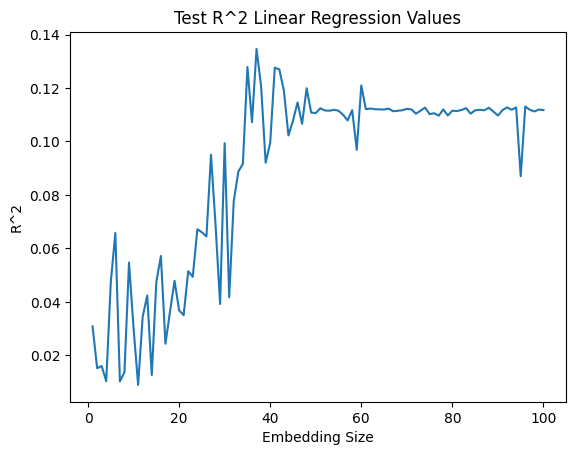

[0.02147863259198801, 0.034641836369400436, 0.027677960627028986, 0.029824220795306666, 0.04394089067963003, 0.06714621154191269, 0.05347825258153871, 0.056826833573124125, 0.07657290398003558, 0.056101232829171455, 0.048705703456899285, 0.07639356522425733, 0.07543070885380465, 0.0644941326138756, 0.06764169459470726, 0.11576079579057386, 0.06749212177415032, 0.09729250051276628, 0.11707545438724976, 0.10046174832596066, 0.10918178849413307, 0.11531484580978635, 0.11847827779078857, 0.1364677832626855, 0.14676857545803113, 0.1324728321579106, 0.1710970284909813, 0.12593402093880757, 0.1114199685314039, 0.15461110330118, 0.14171020621676633, 0.1472798924788884, 0.15897218484994635, 0.18632217770709525, 0.19614235630222865, 0.17811948253202758, 0.18722156802216217, 0.17052975456549768, 0.17101035716404722, 0.18677847157372407, 0.1948696097746655, 0.1895882198856741, 0.2094008423639706, 0.21030162348575165, 0.21268784800485574, 0.21347463941643652, 0.2215400680526285, 0.21276166856059675

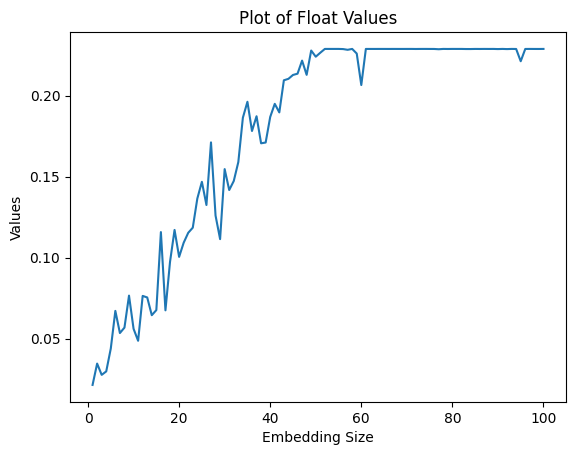

'\ndef save_embeddings(dimensions=10):\n  with open("/content/gdrive/MyDrive/Thesis/data/final_kg.json", "r") as f:\n    data = json.load(f)\n  model = Node2Vec(walk_length=20, walk_number=10, window_size=20, dimensions=dimensions,p=0.5, q=0.5)\n  model.fit(G)\n  embeddings = model.get_embedding()\n  df = pd.DataFrame({\'id\': [d[\'id\'] for d in data],\n                    \'difficulty\': [d[\'difficulty\'] for d in data],\n                    \'question\': [d[\'question\'] for d in data],\n                    \'embedding\': [embeddings[mapping[d["kg"][-1]]] for d in data]})\n  filename = \'/content/gdrive/MyDrive/Thesis/data/embedding\'+str(dimensions) \n  df.to_csv(filename)\n  return df\n\ndef create_model(embedding_dimention=10):\n  input_layer = tf.keras.layers.Input(shape=(embedding_dimention,),name=\'input\')\n  output_layer = tf.keras.layers.Dense(1, activation=\'linear\')(input_layer)\n  model = tf.keras.Model(inputs=input_layer, outputs=output_layer)\n\n  # set optimizer\n  

In [ ]:
import json
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf


# Load data from JSON file
with open("/content/gdrive/MyDrive/Thesis/data/final_kg.json", "r") as f:
    data = json.load(f)

test_results = []
train_results = []
for i in range(1, 101):
  model = Node2Vec(walk_length=20, walk_number=10, window_size=20, dimensions=i,p=0.5, q=0.5)
  model.fit(G)
  embeddings = model.get_embedding()

  X = np.array([embeddings[mapping[subject["kg"][-1]]] for subject in data])
  y = np.array([subject["difficulty"] for subject in data])

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create linear regression model
  model = LinearRegression()

  # Train model on training data
  model.fit(X_train, y_train)

  # Evaluate model on testing data
  score_train = model.score(X_train, y_train)
  score_test = model.score(X_test, y_test)
  test_results.append(score_test)
  train_results.append(score_train)

  print(i, 'score train: ', score_train, 'score test: ', score_test)

import matplotlib.pyplot as plt

x_values = list(range(1, 101))
# Plotting the data
plt.plot(x_values,test_results)
print(test_results)
# Adding labels and title
plt.xlabel('Embedding Size')
plt.ylabel('R^2')
plt.title('Test R^2 Linear Regression Values')

# Display the plot
plt.show()


# Plotting the data
plt.plot(x_values,train_results)
print(train_results)
# Adding labels and title
plt.xlabel('Embedding Size')
plt.ylabel('Values')
plt.title('Plot of Float Values')

# Display the plot
plt.show()

#Save Embeddings

In [ ]:
def save_embeddings(dimensions=10):
  with open("/content/gdrive/MyDrive/Thesis/data/neurIPS_edu_competition_text.json", "r") as f:
    data = json.load(f)
  model = Node2Vec(walk_length=20, walk_number=10, window_size=20, dimensions=dimensions,p=0.5, q=0.5)
  model.fit(G)
  embeddings = model.get_embedding()
  df = pd.DataFrame({'id': [d['id'] for d in data],
                    'difficulty': [d['difficulty'] for d in data],
                    'question': [d['question'] for d in data],
                    'embedding': [embeddings[mapping[d["kg"][-1]]] for d in data]})
  filename = '/content/gdrive/MyDrive/Thesis/data/embedding'+str(dimensions)+'.csv'
  df.to_csv(filename)
  return df

save_embeddings(dimensions=37)

,id,difficulty,question,embedding
0,653,-0.533335,Jo and Paul are trying to calculate the answer...,"[0.61651534, 0.5137792, 1.8639945, -3.3284566,..."
1,149,1.157276,Tom and Katie are arguing about multiplication...,"[-0.6476319, 0.43870458, 1.7839469, -3.645309,..."
2,640,0.653737,What should replace the symbols in the followi...,"[0.61651534, 0.5137792, 1.8639945, -3.3284566,..."
3,855,-1.115896,Which of the following is the best estimate of...,"[0.04602422, 0.5455508, 0.16110307, -0.3742039..."
4,352,1.081682,Jo and Paul are arguing equivalent fractions. ...,"[0.4432029, 0.8106639, 1.4405382, -2.0079508, ..."
...,...,...,...,...
943,334,0.805425,"Which shape(s) will tessellate? Parallelogram,...","[0.4415211, 1.8274982, 0.09577976, -2.3189855,..."
944,337,-0.401319,The sum of two bricks is equal to the brick ab...,"[1.2485883, 1.9032286, -1.4513247, -0.7695071,..."
945,622,-0.559617,What can you say about line segments K and L?,"[-0.03177167, 0.2628183, -0.04966623, -0.18814..."
946,838,0.485487,The diagram shows an equilateral triangle and ...,"[0.6848231, 2.702703, 0.09607663, -1.4256588, ..."
